In [491]:
# Questions are at the end of the norebook ;) 

In [492]:
pip install plotly arabic_reshaper python-bidi


Note: you may need to restart the kernel to use updated packages.


In [493]:
# for visualizing the arabic characters and their direction
import arabic_reshaper
from bidi.algorithm import get_display

import plotly.graph_objects as go

In [494]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [495]:
# -m running module as a script and -U upgrading 
!{sys.executable} -m pip install -U ydata-profiling[notebook]

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [496]:
!{sys.executable} -m pip install -U sweetviz

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [497]:
from ydata_profiling import ProfileReport 

In [498]:
import sweetviz as sv

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [499]:
#Read in the csv file and convert to a Pandas dataframe
df_employment = pd.read_csv('Jadarat_data.csv')


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [500]:
# We have 1470 rows and 18 columns
df_employment.shape

(1470, 18)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

### Columns: 
1. job title: is the job name to offer 
2. job date: it's the time they posted the job 
3. job_desc: it's a description about the job, what is it and what you might fo 
4. job_tasks: they are the tasks that will be mostly assigned to you in the job
5. comp_name: the name of a company
6. comp_no: i think it's the registeration number of a company
7. comp_type: the type of a company, is it private or govermental sector
8. comp_size: the size of a company, is it small or big or medium 
9. eco_activity: the activities that the company is specivied for
10. qualif: what are the qualification to apply for this job
11. region: the place of a company
12. city: it shows the same as region
13. benefits: the salary of a job
14. contract: is it full time or part time job
15. positions: the available positions for this job
16. job_post_id: the id number of the job offer in the Jadarat website
17. exper: the years experience the company want for the job
18. gender: if they want female or male for the job or both


In [501]:
df_employment.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [502]:
df_employment.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [503]:
# Yes data is reliable since it was collected from the data source Jadarat and the person who did the collection mentioned it in Kaggle

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [504]:
# Data is not considered up to date since its last update was in 2023, and the last job dates posted in Jadarat were in 2024
# But since our objective questions didn't focused on the last updated year, and last updated 2023 seemms close to last updated in Jadarat
# I will continuou working in this dataset, and because it's for an educational purpose 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [505]:
# Since we have here one dataset file it's consistent, and aslo it's consistent for the data source 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [506]:
# Yes, the dataset sample is relevant to the objective questions

# for the columns:
# 1. Job date is not useful for us and we won't get any insight from it because the end user looking for an analysis about the jobs,
# and he/she doesn't want to know about which data posted but more about which jobs and posistions related to other factors
# 2. company number column is not useful here also, because it won't give us any insight related to the jobs
# 3. job post id also not important to us
# 4. region column is not the same as city but it gives the same purpose, i will keep it for further insights
df_employment.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [507]:
# it's ok to have duplicated jobs since a company can post multiple same jobs 
df_employment.duplicated().sum()

1

In [508]:
df_employment[df_employment.duplicated()]

job_title    job_date                                           job_desc  \
1469     صيدلي  18/06/1444  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                comp_name    comp_no comp_type    comp_size  \
1469  شركة تقنية الدواجن والألبان للتجارة  1-2415250       خاص  صغيرة فئة ب   

     eco_activity                                             qualif  region  \
1469          NaN  ['Professional certificate \\ License data', '...  الرياض   

              city              benefits   contract positions     job_post_id  \
1469  AR RIYADH...  ['Salary', '7000.0']  دوام كامل     0 / 1  20202026399061   

        exper gender  
1469  0 Years   both

In [509]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [510]:
#Display number missing values per column

# We can see that :
# column comp_size has 14 null calues,
# eco_activity has 83, 
# and qualif has 667 which is huge

df_employment.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [511]:
# checking if there are null values with spaces, slashes, or dashes
def check_nulls(x):
    return x in ['/', ' ', '-']
    
null_values = df_employment.applymap(check_nulls)

rows_with_nulls = df_employment[null_values.any(axis=1)]

rows_with_nulls # there is no null values as space or dash or slash

Empty DataFrame
Columns: [job_title, job_date, job_desc, job_tasks, comp_name, comp_no, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, job_post_id, exper, gender]
Index: []

In [512]:
# we can see here that most of the null values of company_size column having null values in eco_avtivity column too!
df_employment[df_employment['comp_size'].isnull()]

job_title    job_date  \
1296           مدير إداري  25/06/1444   
1393    موظف صندوق محاسبة  01/07/1444   
1399    موظف صندوق محاسبة  29/06/1444   
1401           وسيط عقاري  29/06/1444   
1409                محامي  29/06/1444   
1411        أخصائي قانوني  29/06/1444   
1421            مدير مالي  29/06/1444   
1426             مصفف شعر  29/06/1444   
1432    موظف صندوق محاسبة  27/06/1444   
1436    أخصائي علاج طبيعي  26/06/1444   
1438                 بائع  26/06/1444   
1444  مشرف مدخلي البيانات  26/06/1444   
1451        فني مختبر طبي  25/06/1444   
1456                محامي  24/06/1444   

                                               job_desc  \
1296  ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
1393  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1399  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1401  ['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...   
1409  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   
1411  ['مساعدة العملاء والمنشآت في مختلف المسائل الق...   
1421  ['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...   
1426  ['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...   
1432  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1436  ['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...   
1438  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1444  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1456  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   

                                              job_tasks  \
1296  ['   المشاركة في تطوير الأهداف الرئيسية للشؤون...   
1393  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1399  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1401  ['   تقييم رغبات العملاء والميزانيات المحددة و...   
1409  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   
1411  ['   تأهيل الطلبات وتقييم الخيارات القانونية، ...   
1421  ['   المشاركة في تطوير الأهداف الرئيسية للإدار...   
1426  ['   استقبال العميل وإجلاسه على كرسي القص  ووض...   
1432  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1436  ['   دراسة وتحليل برنامج المعالجة الطبيعية الم...   
1438  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1456  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   

                                              comp_name     comp_no comp_type  \
1296            مكتب تصميم المشاريع للاستشارات الهندسية   4-1990473       خاص   
1393                            مغاسل نسيم الفل للملابس  15-1963098       خاص   
1399                            مغاسل نسيم الفل للملابس  15-1963098       خاص   
1401                                مؤسسة فانس العقارية   1-2268591       خاص   
1409  شركة الخبراء المتحدون للمحاماة والاستشارات الق...   1-2334348       خاص   
1411  شركة الخبراء المتحدون للمحاماة والاستشارات الق...   1-2334348       خاص   
1421                شركة إرفاء المحدودة (شركة شخص واحد)  17-1989300       خاص   
1426                   صالون تشرين ثاني للتزيين النسائي   1-2593881       خاص   
1432                  مؤسسة التذوق الحلو لتقديم الوجبات   1-2559144       خاص   
1436             مجمع ارجوان سامي بن نائف العتيبي الطبي   2-1949575       خاص   
1438                مؤسسة ريان سعد عواد الدهام للحلويات   4-1971557       خاص   
1444                          خالد عوض الجوهي للمقاولات   1-2073853       خاص   
1451                         مجمع ابتسامة العائلة الطبي   1-2599562       خاص   
1456        شركة فيصل عبد الله الفوزان وشركاؤه للمحاماة   1-2664602       خاص   

     comp_size                          eco_activity  \
1296       NaN                                   NaN   
1393       NaN                                   NaN   
1399       NaN                                   NaN   
1401       NaN                                   NaN   
1409       NaN                                   NaN   
1411       NaN                                   NaN   
1421       NaN      

In [513]:
# showing null values if eco_activity column
df_employment[df_employment['eco_activity'].isnull()]

job_title    job_date  \
3         ميكانيكي سيارات  27/05/1444   
25               مدير عام  26/05/1444   
40               مدير فرع  25/05/1444   
42      موظف استقبال فندق  25/05/1444   
47                   بائع  25/05/1444   
...                   ...         ...   
1444  مشرف مدخلي البيانات  26/06/1444   
1451        فني مختبر طبي  25/06/1444   
1467                صيدلي  18/06/1444   
1468  مشغل آلة تشطيب رخام  18/06/1444   
1469                صيدلي  18/06/1444   

                                               job_desc  \
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
25    ['المشاركة في وضع الأهداف العامة والسياسات وال...   
40    ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
42    ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
47    ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
...                                                 ...   
1444  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
25    ['   المشاركة في وضع الأهداف والسياسات والمباد...   
40    ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
42    ['   الحفاظ على قائمة الحجوزات، وتوفير السجلات...   
47    ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
...                                                 ...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name     comp_no comp_type  \
3                               مؤسسة لمكو لغيار الزيوت   8-1925495       خاص   
25                ورشة اضواء المشاعل للحدادة والالمنيوم  10-2010602       خاص   
40                                    شركة الزي للتجارة   9-2079452       خاص   
42                             فندق قصر الواحة الفندقية   1-2440535       خاص   
47                شركة مطعم بيت الشاورما لتقديم الوجبات   1-2239765       خاص   
...                                                 ...         ...       ...   
1444                          خالد عوض الجوهي للمقاولات   1-2073853       خاص   
1451                         مجمع ابتسامة العائلة الطبي   1-2599562       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...  15-1971895       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة   1-2415250       خاص   

         comp_size eco_activity  \
3      صغيرة فئة ب          NaN   
25     صغيرة فئة أ          NaN   
40    متوسطة فئة أ          NaN   
42     صغيرة فئة ب          NaN   
47    متوسطة فئة ج          NaN   
...            ...          ...   
1444           NaN          NaN   
1451           NaN          NaN   
1467   صغيرة فئة ب          NaN   
1468   صغيرة فئة أ          NaN   
1469   صغيرة فئة ب          NaN   

                                                 qualif           region  \
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
25    ['Skill data', 'حداد', 'متوسط', 'Language data...  المدينة المنورة   
40    ['Language data', 'العربية', 'محترف', 'الانجلي...  المنطقة الشرقية   
42    ['Skill data', 'الاستقبال الفندقي', 'محترف', '...           الرياض   
47               ['Language data', 'العربية ', 'محترف']           الرياض   
...                                                 ...              ...   
1444  ['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...           الرياض   
1451  ['Professional certificate \\ License data', '...           الرياض   
1467  ['Professional certif

In [514]:
# here we have a huge null values of qualif column which is an important one to know the qualifications of a job offer, dealing with it is a must!
df_employment[df_employment['qualif'].isnull()]

job_title    job_date  \
1                          بائع  27/05/1444   
14                  مصمم جرافيك  26/05/1444   
15                  مدخل بيانات  26/05/1444   
16                   مطور برامج  26/05/1444   
17            أخصائي إدارة اداء  26/05/1444   
...                         ...         ...   
1454  أخصائي عمليات موارد بشرية  25/06/1444   
1455            فني تصميم داخلي  24/06/1444   
1460                    كيميائي  23/06/1444   
1464                       بائع  21/06/1444   
1465        مهندس تقنية معلومات  19/06/1444   

                                               job_desc  \
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    [' تحليل  وادارة تطبيقات باستخدام الأدوات البر...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
1455  ['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...   
1460  ['دراسة خصائص المواد الكميائية للصناعات الكيمي...   
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   

                                              job_tasks  \
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    ['   تحليل  وادارة تطبيقات باستخدام الأدوات ال...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
1455  ['   وضع التصاميم للمشروعات الداخلية، وإدارة ف...   
1460  ['   إعداد برامج تشغيل الأجهزة والمعدات المخبر...   
1464  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   

                                              comp_name     comp_no comp_type  \
1                          شركة عالم الكهرباء للمقاولات   4-1324428       خاص   
14                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
15                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
16                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
17                      مكتب مدارات للاستشارات الهندسية   3-1971776       خاص   
...                                                 ...         ...       ...   
1454                                  شركـة ذوق للتجارة   1-1526321       خاص   
1455          شركة نمو للبحوث والدراسات (شركة شخص واحد)   1-2166711       خاص   
1460                       شركة نواف صالح البطي للتجارة   1-2604723       خاص   
1464  شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...   8-1977608       خاص   
1465                  مطعم الاوراق الخضر لتقديم الوجبات  15-1698448       خاص   

         comp_size                                       eco_activity qualif  \
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
14    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
15    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
16    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
17    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
...            ...                                                ...    ...   
1454   صغيرة فئة ب         البيع بالتجزئة للوكلاء بالعمولة بدون محلات    NaN   
1455   صغيرة فئة أ                  مراكز البحوث والدراسات الاجتماعية    NaN   
1460   صغيرة فئة ب  تجارة الجملة والتجزئه في أنواع أخرى من المركبا...    NaN   
1464   صغيرة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة    NaN   

               region          city  \
1     المنطقة الشرقية  AD DAMMAM...   
14               حائل      

In [515]:
# we need to clean all of the three columns (comp_size, eco_activity, qualif)
# in the data cleaning section

In [516]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [517]:
# check columns types 
# it shows that positions column needs to change to an int, because 0/number doesn't give any meaning and it might give confusion
# and also the benifits column which is the salary, but this column might contain string like مكافأة سنوية, تأمين صحي...
df_employment.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [518]:
df_employment.head()

job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [519]:
# in the data cleaning section

In [520]:
# go to clean them 

In [521]:
# checking EDA advanced analysis 

In [522]:
# this report gives a comprehensive analysis of the dataset but in my opinion it's not showing the whole analysis of the important EDA steps
# and because the values are in arabic language which affects the analysis 
ProfileReport(df_employment, title='Employement of Jadarat Report in KSA', explorative=True) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [523]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [524]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [525]:
# check outliers: down in the data cleaning

In [526]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [527]:
# relevance: deleting irrelevant columns
# for the columns:
# 1. Job date is not useful for us and we won't get any insight from it because the end user looking for an analysis about the jobs,
# and he/she doesn't want to know about which data posted but more about which jobs and posistions related to other factors
# 2. company number column is not useful here also, because it won't give us any insight related to the jobs
# 3. job post id also not important to us
# 4. region column is not the same as city but it gives the same purpose, i will keep it for further insights

df_employment = df_employment.drop(columns=['job_date', 'comp_no', 'job_post_id'])

In [528]:
df_employment

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                                NaN   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                                NaN   
1468   صغيرة فئة أ                                                NaN   
1469   صغيرة فئة ب                                                NaN   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                   NaN  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [529]:
# uniqueness: no rows deleted 


In [530]:
# completeness: 
# dealing with nulls

# comp_size        14
# eco_activity     83
# qualif          667

df_employment[df_employment['comp_size'].isnull()]


job_title                                           job_desc  \
1296           مدير إداري  ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
1393    موظف صندوق محاسبة  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1399    موظف صندوق محاسبة  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1401           وسيط عقاري  ['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...   
1409                محامي  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   
1411        أخصائي قانوني  ['مساعدة العملاء والمنشآت في مختلف المسائل الق...   
1421            مدير مالي  ['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...   
1426             مصفف شعر  ['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...   
1432    موظف صندوق محاسبة  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1436    أخصائي علاج طبيعي  ['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...   
1438                 بائع  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1444  مشرف مدخلي البيانات  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451        فني مختبر طبي  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1456                محامي  ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   

                                              job_tasks  \
1296  ['   المشاركة في تطوير الأهداف الرئيسية للشؤون...   
1393  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1399  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1401  ['   تقييم رغبات العملاء والميزانيات المحددة و...   
1409  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   
1411  ['   تأهيل الطلبات وتقييم الخيارات القانونية، ...   
1421  ['   المشاركة في تطوير الأهداف الرئيسية للإدار...   
1426  ['   استقبال العميل وإجلاسه على كرسي القص  ووض...   
1432  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1436  ['   دراسة وتحليل برنامج المعالجة الطبيعية الم...   
1438  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1456  ['   استقبال القضية وتحديد نوعها وتحليل عناصره...   

                                              comp_name comp_type comp_size  \
1296            مكتب تصميم المشاريع للاستشارات الهندسية       خاص       NaN   
1393                            مغاسل نسيم الفل للملابس       خاص       NaN   
1399                            مغاسل نسيم الفل للملابس       خاص       NaN   
1401                                مؤسسة فانس العقارية       خاص       NaN   
1409  شركة الخبراء المتحدون للمحاماة والاستشارات الق...       خاص       NaN   
1411  شركة الخبراء المتحدون للمحاماة والاستشارات الق...       خاص       NaN   
1421                شركة إرفاء المحدودة (شركة شخص واحد)       خاص       NaN   
1426                   صالون تشرين ثاني للتزيين النسائي       خاص       NaN   
1432                  مؤسسة التذوق الحلو لتقديم الوجبات       خاص       NaN   
1436             مجمع ارجوان سامي بن نائف العتيبي الطبي       خاص       NaN   
1438                مؤسسة ريان سعد عواد الدهام للحلويات       خاص       NaN   
1444                          خالد عوض الجوهي للمقاولات       خاص       NaN   
1451                         مجمع ابتسامة العائلة الطبي       خاص       NaN   
1456        شركة فيصل عبد الله الفوزان وشركاؤه للمحاماة       خاص       NaN   

                              eco_activity  \
1296                                   NaN   
1393                                   NaN   
1399                                   NaN   
1401                                   NaN   
1409                                   NaN   
1411                                   NaN   
1421                                   NaN   
1426                                   NaN   
1432                                   NaN   
1436                                   NaN   
1438                                   NaN   
1444                                   NaN   
1451                                   NaN   
1456  أنشطة المحاماة والاستشارات القانونية   

                                                 qua

In [531]:
df_employment['comp_size'].isnull().sum()

14

In [532]:
df_employment[df_employment['eco_activity'].isnull()]

job_title                                           job_desc  \
3         ميكانيكي سيارات  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
25               مدير عام  ['المشاركة في وضع الأهداف العامة والسياسات وال...   
40               مدير فرع  ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
42      موظف استقبال فندق  ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
47                   بائع  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
...                   ...                                                ...   
1444  مشرف مدخلي البيانات  ['الإشراف على مدخلي البيانات والتأكد من صحة ال...   
1451        فني مختبر طبي  ['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...   
1467                صيدلي  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  مشغل آلة تشطيب رخام  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469                صيدلي  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
25    ['   المشاركة في وضع الأهداف والسياسات والمباد...   
40    ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
42    ['   الحفاظ على قائمة الحجوزات، وتوفير السجلات...   
47    ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
...                                                 ...   
1444  ['   تدقيق البيانات بعد إدخالها، والتأكد من صح...   
1451  ['   تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
3                               مؤسسة لمكو لغيار الزيوت       خاص   
25                ورشة اضواء المشاعل للحدادة والالمنيوم       خاص   
40                                    شركة الزي للتجارة       خاص   
42                             فندق قصر الواحة الفندقية       خاص   
47                شركة مطعم بيت الشاورما لتقديم الوجبات       خاص   
...                                                 ...       ...   
1444                          خالد عوض الجوهي للمقاولات       خاص   
1451                         مجمع ابتسامة العائلة الطبي       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size eco_activity  \
3      صغيرة فئة ب          NaN   
25     صغيرة فئة أ          NaN   
40    متوسطة فئة أ          NaN   
42     صغيرة فئة ب          NaN   
47    متوسطة فئة ج          NaN   
...            ...          ...   
1444           NaN          NaN   
1451           NaN          NaN   
1467   صغيرة فئة ب          NaN   
1468   صغيرة فئة أ          NaN   
1469   صغيرة فئة ب          NaN   

                                                 qualif           region  \
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
25    ['Skill data', 'حداد', 'متوسط', 'Language data...  المدينة المنورة   
40    ['Language data', 'العربية', 'محترف', 'الانجلي...  المنطقة الشرقية   
42    ['Skill data', 'الاستقبال الفندقي', 'محترف', '...           الرياض   
47               ['Language data', 'العربية ', 'محترف']           الرياض   
...                                                 ...              ...   
1444  ['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...           الرياض   
1451  ['Professional certificate \\ License data', '...           الرياض   
1467  ['Professional certificate \\ License data', '...           الرياض   
1468  ['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...  المنطقة الشرقية   
1469  ['Professional certificate \\ License data', '...           الرياض   

              city                                           benefits  \
3      AL HUFUF...                               ['Salary', '5000.0']   
25    AL MADINA...                   

In [533]:
df_employement['eco_activity'].isnull().sum()

0

In [534]:
df_employment[df_employment['qualif'].isnull()]

job_title  \
1                          بائع   
14                  مصمم جرافيك   
15                  مدخل بيانات   
16                   مطور برامج   
17            أخصائي إدارة اداء   
...                         ...   
1454  أخصائي عمليات موارد بشرية   
1455            فني تصميم داخلي   
1460                    كيميائي   
1464                       بائع   
1465        مهندس تقنية معلومات   

                                               job_desc  \
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    [' تحليل  وادارة تطبيقات باستخدام الأدوات البر...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
1455  ['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...   
1460  ['دراسة خصائص المواد الكميائية للصناعات الكيمي...   
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   

                                              job_tasks  \
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
14    ['لديه الخبرة   في اخراج العروض التقديمية الرس...   
15          ['التمكن من استخدام برامج مايكروسفت أوفيس']   
16    ['   تحليل  وادارة تطبيقات باستخدام الأدوات ال...   
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
...                                                 ...   
1454  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
1455  ['   وضع التصاميم للمشروعات الداخلية، وإدارة ف...   
1460  ['   إعداد برامج تشغيل الأجهزة والمعدات المخبر...   
1464  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   

                                              comp_name comp_type  \
1                          شركة عالم الكهرباء للمقاولات       خاص   
14                      مكتب مدارات للاستشارات الهندسية       خاص   
15                      مكتب مدارات للاستشارات الهندسية       خاص   
16                      مكتب مدارات للاستشارات الهندسية       خاص   
17                      مكتب مدارات للاستشارات الهندسية       خاص   
...                                                 ...       ...   
1454                                  شركـة ذوق للتجارة       خاص   
1455          شركة نمو للبحوث والدراسات (شركة شخص واحد)       خاص   
1460                       شركة نواف صالح البطي للتجارة       خاص   
1464  شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...       خاص   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   

         comp_size                                       eco_activity qualif  \
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
14    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
15    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
16    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
17    متوسطة فئة ب                           إدارة المشاريع الانشائية    NaN   
...            ...                                                ...    ...   
1454   صغيرة فئة ب         البيع بالتجزئة للوكلاء بالعمولة بدون محلات    NaN   
1455   صغيرة فئة أ                  مراكز البحوث والدراسات الاجتماعية    NaN   
1460   صغيرة فئة ب  تجارة الجملة والتجزئه في أنواع أخرى من المركبا...    NaN   
1464   صغيرة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...    NaN   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة    NaN   

               region          city  \
1     المنطقة الشرقية  AD DAMMAM...   
14               حائل       HAIL...   
15               حائل       HAIL...   
16               حائل       HAIL...   
17               حائل       HAIL...   
...               ...           ...   
1454           الرياض  AR RIYADH...   
1455           الرياض  AR RIYADH...   
1460           الرياض  AR RIYADH...   
146

In [535]:
df_employement['qualif'].isnull().sum()

0

In [536]:
# Procedure of cleaning:
# to deal with these null values i will fill them with '!مجهول' 
# because it might be null because the company didn't fill these details that were not mandatory to fill (related to SWE dev)
# and i will see how to deal them later in the visualization dection

In [537]:
# 1st cleaning column: comp_size

df_employment['comp_size'] = df_employment['comp_size'].fillna('!مجهول')
df_employment[df_employment['comp_size'].isnull()]

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [538]:
# 2nd cleaning column: eco_activity

df_employment['eco_activity'] = df_employment['eco_activity'].fillna('!مجهول')
df_employment[df_employment['eco_activity'].isnull()]

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [539]:
# 3rd cleaning column: qualif

df_employment['qualif'] = df_employment['qualif'].fillna('!مجهول')
df_employment[df_employment['qualif'].isnull()]

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [540]:
# Accuracy Checking:

In [541]:
# change 'positions' column data type
# 1st I will split the values from / and keep only the number that shows the positions available

df_employment['positions'] = df_employment['positions'].map(lambda r: r.split('/')[1] if '/' in r else r)

In [542]:
df_employment.head()

job_title  \
0                      محاسب   
1                       بائع   
2  أخصائي عمليات موارد بشرية   
3            ميكانيكي سيارات   
4                      محاسب   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name comp_type     comp_size  \
0      شركة مقر العالم للسفريات       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات       خاص  متوسطة فئة ب   
2               شركه دار السلام       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                             !مجهول   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                             !مجهول  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions    exper gender  
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل         1  0 Years   both  
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل         3  0 Years   both  
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل         2  2 Years   both  
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل        10  0 Years      M  
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل         1  0 Years   both

In [543]:
# changing data type of (positions) to int
#df_employement['positions'] = df_employement['positions'].astype(int)

In [544]:
# change 'benefits' column data type
# 1st I will split the values as list to take the number(slalry) 
df_employment['benefits']

0                                    ['Salary', '5000.0']
1                                    ['Salary', '5000.0']
2                                    ['Salary', '4000.0']
3                                    ['Salary', '5000.0']
4                                    ['Salary', '5000.0']
                              ...                        
1465                                 ['Salary', '5500.0']
1466                                 ['Salary', '4000.0']
1467                                 ['Salary', '7000.0']
1468    ['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...
1469                                 ['Salary', '7000.0']
Name: benefits, Length: 1470, dtype: object

In [545]:
# here we will filter benifits if there are benefits like: اجازة سنوية أو تأمين صحي أو مكافأة 
filtered_benefits_vac = df_employment[df_employment['benefits'].apply(lambda x: any('اجازة سنوية' in str(item) for item in x))]
filtered_benefits_vac

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [546]:
# here we will filter benifits if there are benefits like: اجازة سنوية أو تأمين صحي أو مكافأة 
filtered_benefits_ins = df_employment[df_employment['benefits'].apply(lambda x: any('تأمين صحي' in str(item) for item in x))]
filtered_benefits_ins

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [547]:
# here we will filter benifits if there are benefits like: اجازة سنوية أو تأمين صحي أو مكافأة 
filtered_benefits_com = df_employment[df_employment['benefits'].apply(lambda x: any('مكافأة' in str(item) for item in x))]
filtered_benefits_com

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [548]:
# since there are string texts that explain the benifits with the price we won't change it but
# i will extract the salary number and put it in another column called salary for further analysis

In [549]:
df_employment.dtypes

job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
exper           object
gender          object
dtype: object

In [550]:
def extract_salary(benefits_str):
    # converting string representation of list to actual list then extract the salary number
    benefits_list = eval(benefits_str)  
    for i in range(len(benefits_list)):
        if benefits_list[i] == 'Salary':
            return benefits_list[i + 1]
    return None

In [551]:
# creating new column with salary values
df_employment['salary'] = df_employment['benefits'].apply(extract_salary)
df_employment

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                             !مجهول   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                             !مجهول   
1468   صغيرة فئة أ                                             !مجهول   
1469   صغيرة فئة ب                                             !مجهول   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                !مجهول  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [552]:
df_employment.dtypes

job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
exper           object
gender          object
salary          object
dtype: object

In [553]:
df_employment['salary'] = df_employment['salary'].astype(float)

In [554]:
df_employment['positions'] = df_employment['positions'].astype(int)

In [555]:
df_employment.dtypes

job_title        object
job_desc         object
job_tasks        object
comp_name        object
comp_type        object
comp_size        object
eco_activity     object
qualif           object
region           object
city             object
benefits         object
contract         object
positions         int32
exper            object
gender           object
salary          float64
dtype: object

### Correcting errors

-------------------

In [556]:
# ckecking outliers 

In [557]:
df_employment.head()

job_title  \
0                      محاسب   
1                       بائع   
2  أخصائي عمليات موارد بشرية   
3            ميكانيكي سيارات   
4                      محاسب   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name comp_type     comp_size  \
0      شركة مقر العالم للسفريات       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات       خاص  متوسطة فئة ب   
2               شركه دار السلام       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                             !مجهول   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                             !مجهول  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract  positions    exper gender  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل          1  0 Years   both   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل          3  0 Years   both   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل          2  2 Years   both   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل         10  0 Years      M   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل          1  0 Years   both   

   salary  
0  5000.0  
1  5000.0  
2  4000.0  
3  5000.0  
4  5000.0

In [558]:
df_employment.columns

Index(['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'exper', 'gender', 'salary'],
      dtype='object')

In [559]:
# checking
emp_report = sv.analyze(df_employment)
emp_report.show_html('employ_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1588 (\N{ARABIC LETTER SHEEN}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Matplotlib currently does not support Arabic natively.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1576 (\N{ARABIC LETTER BEH}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1607 (\N{ARABIC LETTER HEH}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1581 (\N{ARABIC LETTER HAH}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1603 (\N{ARABIC LETTER KAF}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1608 (\N{ARABIC LETTER WAW}) missing from current font.

C:\Users\ha

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Matplotlib currently does not support Arabic natively.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1604 (\N{ARABIC LETTER LAM}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1605 (\N{ARABIC LETTER MEEM}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1583 (\N{ARABIC LETTER DAL}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1610 (\N{ARABIC LETTER YEH}) missing from current font.

C:\Users\hatoo\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1606 (\N{ARABIC LETTER NOON}) missing from current font.

C:\Users\h

Report employ_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Examining columns for the outliers: 

In [560]:
# Job title:
# we can see here that the top posted 5 jobs in Jadarat is:
# 1. بائع
# 2. محاسب
# 3. أخصائي تسويق
# 4. مساعد إداري
# 5. موظف استقبال

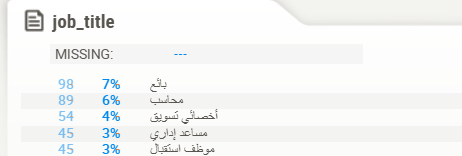

In [561]:
# company type:
# we can see that most of the jobs posted are from the private sector and only 5 jobs in the data from govermental sector
df_employment[df_employment['comp_type']== 'خاص'].value_counts().sum()


1465

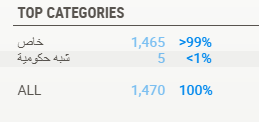

In [562]:
# Company size:
# and here we can see that the most jobs posted are considered as startups 
# almost 635 companies are startups 
# and 46 companies are enterpise 

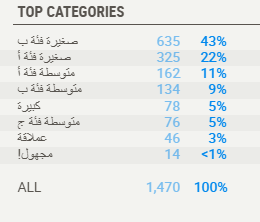

In [563]:
# Region column:
# and here we can see that most jobs posted that are in region column are from Riyadh and comes after it Makkah!

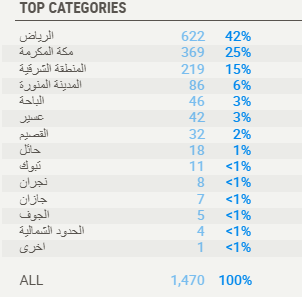

In [564]:
# Contract:
# and here we can see that 99% of posted jobs are asking for full time jobs

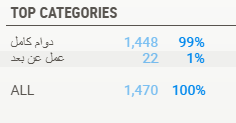

In [565]:
# Experience: 
# we can see here that most wanted jobs is with no experience, fitting the fresh grads
# but there are jobs for 10 years experience or more, let's see them 

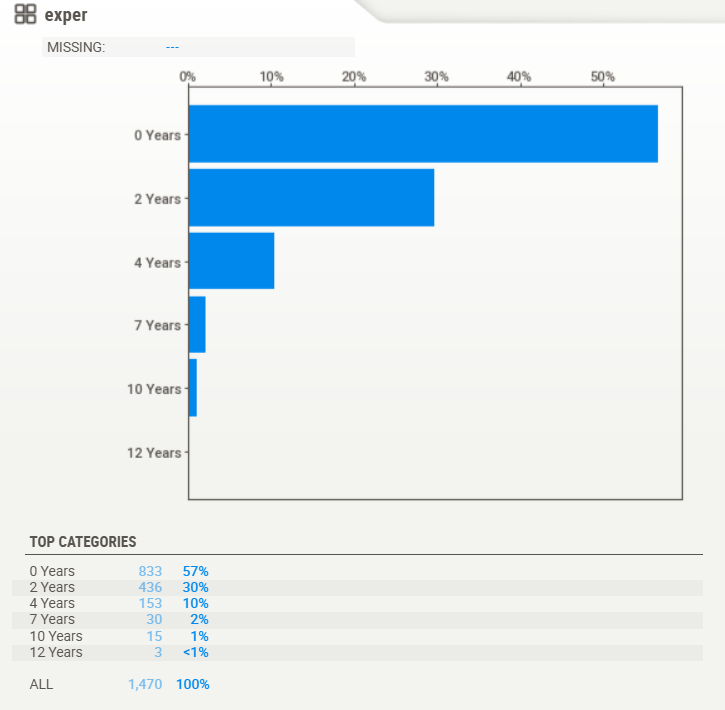

In [566]:
# most of the jobs are reasonable related to their salary, but a security guy with 10 years experience is a bit wierd
df_employment[df_employment['exper'] =='10 Years']

job_title  \
17        أخصائي إدارة اداء   
429                حارس أمن   
442           مهندس كهربائي   
506              مدير إداري   
558             مدير حسابات   
578              وكيل مدرسة   
749             رئيس تنفيذي   
841              مهندس مدني   
888          طيار جناح ثابت   
947   أخصائي استشارات أعمال   
1132         طيار جناح ثابت   
1169               مدير فرع   
1171           مهندس معماري   
1254         فني حساب كميات   
1255             مهندس مدني   

                                               job_desc  \
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
429   ['القيام بدوريات ومراقبة أماكن العمل لحراسة ال...   
442   ['إعداد التصاميم والمخططات الكهربائية لمشاريع ...   
506   ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
558   ['المشاركة في تطوير الأهداف الرئيسية وسياسات و...   
578   ['المشاركة في عملية إعداد الخطط الدورية والتشغ...   
749   ['المشاركة في وضع الأهداف والخطط الإستراتيجية ...   
841   [' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...   
888   ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
947   ['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1169  ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
1171  ['تصميم المباني الجديدة أو الملحقات أو التعديل...   
1254  ['حساب كميات المواد اللازمة لتنفيذ الأعمال و إ...   
1255  ['دراسة طبوغرافية وجيولوجية الموقع الإنشائي ون...   

                                              job_tasks  \
17    [' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...   
429   ['   مراقبة عمليات الدخول إلى المنشأة ومغادرته...   
442   ['   إعداد التصاميم والمخططات الكهربائية لمشار...   
506   ['   المشاركة في تطوير الأهداف الرئيسية للشؤون...   
558   ['   المشاركة في تطوير الأهداف الرئيسية لإدارة...   
578   ['وكيلة شؤون تعليمية في مدرسة عالمية    متابعة...   
749   ['   المشاركة في وضع الإستراتيجية العامة وتحقي...   
841   [' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...   
888   ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
947   ['   تقديم استشارات  لتطوير الأهداف الرئيسيةفي...   
1132  ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
1169  ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
1171  ['   وضع التصاميم لمشاريع الإنشاءات وإدارة فري...   
1254  ['   دراسة المخططات الهندسية للمشروع، و دراسة ...   
1255  ['   دراسة طبوغرافية وجيولوجية الموقع الإنشائي...   

                                              comp_name   comp_type  \
17                      مكتب مدارات للاستشارات الهندسية         خاص   
429                           مؤسسة الرجل أنيق التجارية         خاص   
442             مكتب الإبداع الحديث للاستشارات الهندسية         خاص   
506   شركة خالد بن عبدالعزيز الملحم وشركاؤه للاستشار...         خاص   
558     شركة روافد الحقول للوجبات السريعة شركة شخص واحد         خاص   
578                    شركة مدارس موسوعة العلوم الاهلية         خاص   
749                 مؤسسة لحظات القهوة لتقديم المشروبات         خاص   
841                     مكتب مدارات للاستشارات الهندسية         خاص   
888                                     شركة طيران اديل         خاص   
947                 برنامج مستشفى الملك فهدللحرس الوطني  شبه حكومية   
1132                                    شركة طيران اديل         خاص   
1169                          شركة إختبار التربة للقياس         خاص   
1171                    شركة متوازي للاستشارات الهندسية         خاص   
1254  شركة زهير فايز  ومشاركوه للاستشارات المعمارية ...         خاص   
1255  شركة زهير فايز  ومشاركوه للاستشارات المعمارية ...         خاص   

         comp_size                                       eco_activity  \
17    متوسطة فئة ب                           إدارة المشاريع الانشائية   
429    صغيرة فئة أ            البيع بالتجزئة للملابس الجاهزة الرجالية   
442    صغيرة فئة أ  تقديم خدمات الاستشارات الهندسية في مجال الوقاي...   
506    صغيرة فئة أ               أنشطة الاستشارات الهندسية والمعمارية   
558    صغيرة فئة ب                                  المطاعم مع الخدمة   
578   متوسطة فئة أ                التعليم المتوسط للطالب

In [567]:
# let's see the jobs with 12 years experience
# the jobs seems reasonable to have a long experience i assume 
df_employment[df_employment['exper'] =='12 Years']

job_title                                           job_desc  \
229        مدير مكتب  ['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...   
246       مدير إداري  ['- تخصص هندسة كهربائية او هندسة ميكانيكية.', ...   
458  معلم رياض أطفال  ['إعداد خطة تدريس المباحث المختلفة في رياض الأ...   

                                             job_tasks  \
229  ['   إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...   
246  [' - تخصص هندسة كهربائية او هندسة ميكانيكية.',...   
458  ['   دراسة وتحليل مناهج المباحث والكتب المدرسي...   

                                             comp_name comp_type    comp_size  \
229  مكتب محمد طه عبدالقادر السقاف للاستشارات الهندسية       خاص  صغيرة فئة ب   
246                     شركة العمق للاستشارات الهندسية       خاص  صغيرة فئة ب   
458          مركز النجوم العالية ضيافة الأطفال الأهلية       خاص  صغيرة فئة أ   

                             eco_activity  \
229    الاستشارات الهندسية للتخطيط الحضري   
246  أنشطة الاستشارات الهندسية والمعمارية   
458           مراكز ضيافة الأطفال الأهلية   

                                                qualif           region  \
229  ['Language data', 'العربية', 'محترف', 'الانجلي...      مكة المكرمة   
246             ['Language data', 'انجليزيه', 'محترف']      مكة المكرمة   
458             ['Skill data', 'لغة إنجليزي', 'متوسط']  المنطقة الشرقية   

             city               benefits   contract  positions     exper  \
229  MAKKAH AL...  ['Salary', '15000.0']  دوام كامل          1  12 Years   
246    GHITHAH...  ['Salary', '10000.0']  دوام كامل          1  12 Years   
458  AD DAMMAM...   ['Salary', '7500.0']  دوام كامل          1  12 Years   

    gender   salary  
229   both  15000.0  
246      M  10000.0  
458      F   7500.0

In [568]:
# Gender:
# we can see that most gender wanted in the posted jobs are both of them 
# and then around 33% of jobs posted asked for males

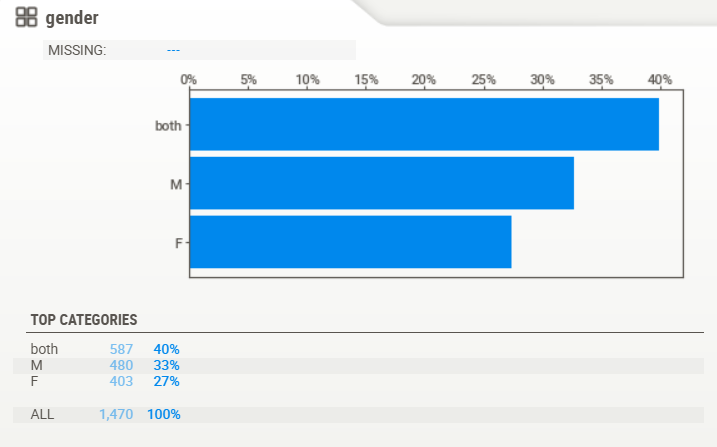

In [569]:
# Salary:
# we can see that the average salary of the jobs posted are around 5200
# and the max is: 35000 
# the min is: 3000
# but let's see the jobs that has more than 15000 to make sure they are not outliers

In [570]:
df_employment['salary'].mean()

5294.650340136054

In [571]:
df_employment['salary'].max()

35000.0

In [572]:
df_employment['salary'].min()

3000.0

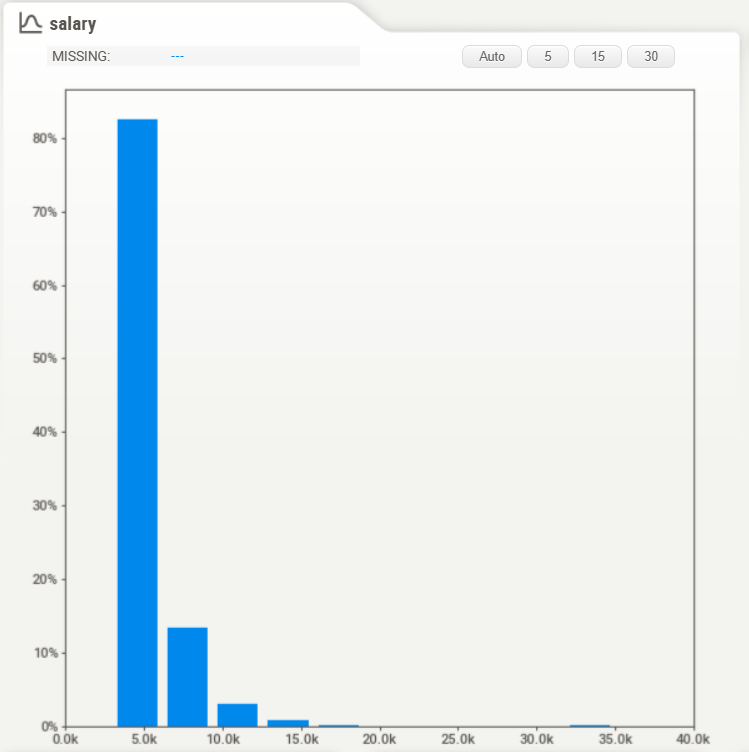

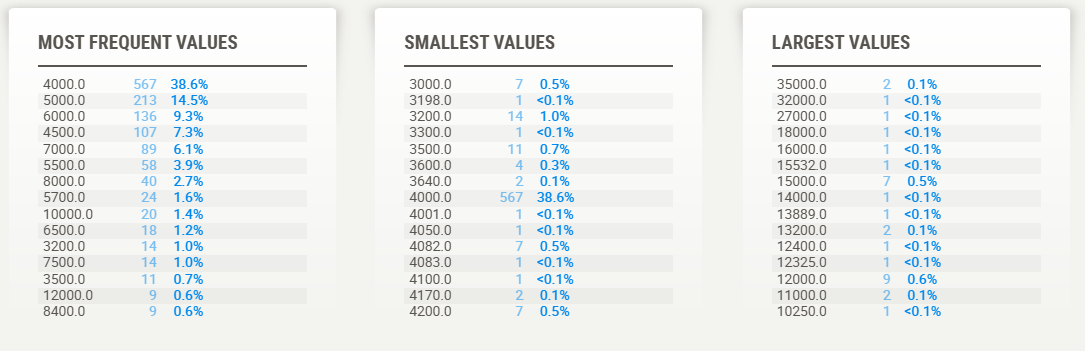

In [573]:
# most of the jobs for them are for CEO or managers or engineers so it's logical 
df_employment[df_employment['salary'] >= 15000]

job_title  \
170   مهندس نظم تقنية معلومات   
171              مدير برمجيات   
174   فني شبكات تقنية معلومات   
229                 مدير مكتب   
470   مدير عمليات موارد بشرية   
530   مدير عمليات موارد بشرية   
559                مدير تسويق   
749               رئيس تنفيذي   
841                مهندس مدني   
888            طيار جناح ثابت   
947     أخصائي استشارات أعمال   
1132           طيار جناح ثابت   
1169                 مدير فرع   
1239             مهندس معماري   

                                               job_desc  \
170   ['متابعة وتقييم عملية جمع المعطيات ومتطلبات نظ...   
171   ['المشاركة في تخطيط استراتيجية وأنشطة تطوير ال...   
174   ['تقديم الدعم والمساعدة الفنية للموظفين والعمل...   
229   ['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...   
470   ['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...   
530   ['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...   
559   ['المشاركة في وضع الأهداف والسياسات والخطط الت...   
749   ['المشاركة في وضع الأهداف والخطط الإستراتيجية ...   
841   [' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...   
888   ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
947   ['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1169  ['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...   
1239  ['تصميم المباني الجديدة أو الملحقات أو التعديل...   

                                              job_tasks  \
170   ['   إجراء الابحاث والدراسات اللازمة لتطوير بي...   
171   ['   إنشاء برامج تطوير البرامج وفقاً لاستراتيج...   
174   ['   تقديم الدعم والمساعدة الفنية للموظفين وال...   
229   ['   إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...   
470   ['   المشاركة في تطوير الأهداف الرئيسية لإدارة...   
530   ['   المشاركة في تطوير الأهداف الرئيسية لإدارة...   
559   ['   المشاركة في وضع الأهداف والسياسات والمباد...   
749   ['   المشاركة في وضع الإستراتيجية العامة وتحقي...   
841   [' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...   
888   ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
947   ['   تقديم استشارات  لتطوير الأهداف الرئيسيةفي...   
1132  ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
1169  ['   المشاركة في وضع وإعداد الخطط والأهداف الخ...   
1239  ['   وضع التصاميم لمشاريع الإنشاءات وإدارة فري...   

                                              comp_name   comp_type  \
170   شركه العرض المتقن للخدمات التجارية شركة مساهمة...         خاص   
171   شركه العرض المتقن للخدمات التجارية شركة مساهمة...         خاص   
174   شركه العرض المتقن للخدمات التجارية شركة مساهمة...         خاص   
229   مكتب محمد طه عبدالقادر السقاف للاستشارات الهندسية         خاص   
470                            شركة ال جي شاكر المحدوده         خاص   
530                                   شركة انكر اليابان         خاص   
559     شركة روافد الحقول للوجبات السريعة شركة شخص واحد         خاص   
749                 مؤسسة لحظات القهوة لتقديم المشروبات         خاص   
841                     مكتب مدارات للاستشارات الهندسية         خاص   
888                                     شركة طيران اديل         خاص   
947                 برنامج مستشفى الملك فهدللحرس الوطني  شبه حكومية   
1132                                    شركة طيران اديل         خاص   
1169                          شركة إختبار التربة للقياس         خاص   
1239  شركة المساحون العرب نصر أحمد اسحاق الحسيني للا...         خاص   

         comp_size                                       eco_activity  \
170         عملاقة              التسجيل لتقديم خدمات الحوسبة السحابية   
171         عملاقة              التسجيل لتقديم خدمات الحوسبة السحابية   
174         عملاقة              التسجيل لتقديم خدمات الحوسبة السحابية   
229    صغيرة فئة ب                 الاستشارات الهندسية للتخطيط الحضري   
470   متوسطة فئة ج   صناعة أجهزة تكييف الهواء (وحدات أو مركزي ) فريون   
530    صغيرة فئة ب  خدمات المكاتب العلمية والفنية للمنتجات عدا الم...   
559    صغيرة فئة ب                                  المطاعم مع الخدمة   
749    صغيرة فئة ب               محلات تقديم المشروبات ( الكوفي شوب )   
841   متوسطة فئة ب           

In [574]:
# psoition:
# some of the positions number are logical but some are not 
# for ex: a company needs 50 pilot for their company in two rows, i don't think it's logical 

In [575]:
df_employment[df_employment['positions'] >= 50]

# because there are some jobs having the same positions and they are logical, i'll keep them

job_title  \
47                              بائع   
303                       سائق سيارة   
304                       سائق سيارة   
316                       سائق سيارة   
317                       سائق سيارة   
319                       سائق سيارة   
320                       سائق سيارة   
321                       سائق سيارة   
412                            قهوجي   
641                       سائق سيارة   
665                أخصائي خدمة عملاء   
666                       سائق سيارة   
676   كاتب استعلامات مركز خدمة عملاء   
687   كاتب استعلامات مركز خدمة عملاء   
688                أخصائي خدمة عملاء   
737                         حارس أمن   
846                             بائع   
888                   طيار جناح ثابت   
1064               موظف صندوق محاسبة   
1132                  طيار جناح ثابت   

                                               job_desc  \
47    ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
303   ['توصيل طلبات من المطاعم/المحلات التجارية عبر ...   
304   ['توصيل طلبات من المطاعم/المحلات التجارية عبر ...   
316   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
317   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
319   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
320   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
321   ['مندوب توصيل طلبات في تطبيقات التوصيل (جاهز J...   
412   ['القيام بإعداد المشروبات كالقهوة و الشاي والك...   
641   ['قيادة السيارة لنقل الركاب أو البضائع والالتز...   
665   ['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...   
666   ['قيادة السيارة لنقل الركاب أو البضائع والالتز...   
676   ['قديم كل ما يلزم من مساعدة ودعم للمسافرين حسب...   
687   ['قديم كل ما يلزم من مساعدة ودعم للمسافرين حسب...   
688   ['تقديم كل ما يلزم من مساعدة ودعم للمسافرين حس...   
737   ['القيام بدوريات ومراقبة أماكن العمل لحراسة ال...   
846   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
888   ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1064  ['عد المبالغ المالية المتوافرة في آلة تسجيل ال...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   

                                              job_tasks  \
47    ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
303   ['توصيل عدد 360 طلب شهريا', '', 'الشروط:-', '(...   
304   ['توصيل عدد 360 طلب شهريا', '', 'الشروط:-', '(...   
316   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
317   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
319   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
320   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
321   ['القبول على الطلبات الواردة في تطبيق العمل ال...   
412   ['   غسل الأواني و الأكواب المستخدمة، وإعدادها...   
641   ['   قيادة السيارة  لنقل الركاب أو البضائع من ...   
665   ['   إجراء الدراسات والتحاليل المتخصصة بهدف وض...   
666   ['   قيادة السيارة  لنقل الركاب أو البضائع من ...   
676   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
687   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
688   ['1. تقديم خدمات العملاء المباشرة ، بما في ذلك...   
737   ['   مراقبة عمليات الدخول إلى المنشأة ومغادرته...   
846   ['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...   
888   ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
1064  ['   عدّ المبالغ المالية وتسجيلها في آلة تسجيل...   
1132  ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   

                                           comp_name comp_type     comp_size  \
47             شركة مطعم بيت الشاورما لتقديم الوجبات       خاص  متوسطة فئة ج   
303           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
304           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
316           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
317           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
319           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
320           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   صغيرة فئة أ   
321           مؤسسة ابراهيم يوسف ابراهيم كويتي للنقل       خاص   ص

In [576]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [577]:
# no outliers 

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Q1: What proportion of job postings is attributed to each region within the kingdom?

In [578]:
# it shows that Riyadh has the maximum number of job postings because it's the capital city of KSA, 
# after that Makkah comes which made me suprised! i thnk it has max number because now everyone can easily visit saudi and do hajj and umrah and that affects on the market their too
df_region = df_employment['region'].value_counts()
df_region = df_region.head()
df_region

region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
Name: count, dtype: int64

In [579]:
# to deal with reshaping arabic characters in their context and reordering as RTL
labels = [get_display(arabic_reshaper.reshape(label)) for label in df_region.index]

In [580]:

fig = go.Figure(go.Bar(
    x=df_region.values,  
    y=labels,
    orientation='h',
    marker_color='#fc8eac'
))

fig.update_layout(
    title='Jobs Posted by Region',
    xaxis_title='Jobs Posted',
    yaxis_title='Region',
    yaxis=dict(autorange="reversed")  
)

fig.show()

## Q2: Is there a gender preference indicated in the job postings?

In [581]:
# yes as the data show there are many companies that prefer to hire males than females, and this might lead to another question
# which jobs are most likely they prefer to hire males? or females?
gender_counts = df_employment['gender'].value_counts()
gender_counts

gender
both    587
M       480
F       403
Name: count, dtype: int64

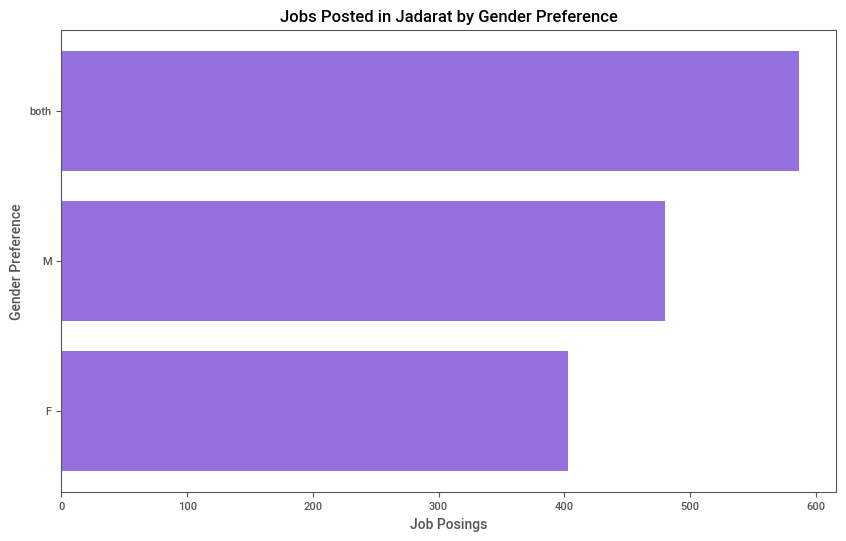

In [582]:
plt.figure(figsize=(10,6))
plt.barh(gender_counts.index, gender_counts.values, color='#fc8eac')  

plt.barh(gender_counts.index, gender_counts.values, color='mediumpurple'
         
)
plt.title('Jobs Posted in Jadarat by Gender Preference')
plt.xlabel('Job Posings')
plt.ylabel('Gender Preference')
plt.gca().invert_yaxis()
plt.show()

## Q3: What is the expected salary range for fresh graduates?

In [583]:
# first let's see the fresh grad who have 0 experience because they just got graduated
df_fresh_grad = df_employment[df_employment['exper'] == '0 Years']

In [595]:
# then let's see the min and max salary of them
min_salary = df_fresh_grad['salary'].min()
max_salary = df_fresh_grad['salary'].max()

print('The range salary of fresh graduates is around: ', max_salary , ' and ', min_salary) 
# which is in reality seems real 

The range salary of fresh graduates is around:  12325.0  and  3000.0


## Q4: Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

In [585]:
# as it shows here, the number of job posting with 0 experience that most likely targets fresh graduates is 805 posting
df_fresh_grad['exper'].value_counts()

exper
0 Years    833
Name: count, dtype: int64

In [586]:
df_with_exp = df_employment[df_employment['exper'] >= '1 Years'] 

In [587]:
df_with_exp['exper'].unique()

array(['2 Years', '4 Years', '10 Years', '7 Years', '12 Years'],
      dtype=object)

In [588]:
# and for the job postings with 1 year or more experience is 619, which leads that alway a room for fresh graduates
# and i think the reason is because the salary won't be high like the ones with experience 
df_with_exp['exper'].value_counts().sum()

637

## Q5:  Which jobs are most likely they prefer to hire males? or females?

In [589]:
# filtering females job postings
female_pref = df_employment[df_employment['gender'] == 'F']['job_title']
female_pref.value_counts().sum() 

403

In [590]:
# we can see here that accountant is the most job post that they prefer females for it 
female_pref.value_counts()

job_title
محاسب                      32
موظف استقبال               29
بائع                       23
أخصائي تسويق               20
مساعد إداري                19
                           ..
معلم ابتدائي لغة أجنبية     1
فني دعم تقنية معلومات       1
مساعد رعاية مرضى            1
مشرف تنظيف وتدبير           1
حارس أمن                    1
Name: count, Length: 112, dtype: int64

In [591]:
female_pref.unique()

array(['سكرتير تنفيذي', 'مدير مكتب', 'أخصائي إدارة مشاريع', 'مصمم جرافيك',
       'مدير حساب عميل', 'مدخل بيانات', 'كيميائي', 'محاسب', 'مساعد إداري',
       'كاتب علاقات حكومية', 'معلم حضانة', 'بائع',
       'أخصائي عمليات موارد بشرية', 'معلم صفوف أولية', 'صيدلي',
       'مهندس معماري', 'مدير تسويق', 'كاتب موارد بشرية', 'نادل', 'طاهي',
       'موظف استقبال', 'محصل', 'طبيب أسنان عام', 'سكرتير طبي',
       'بائع مأكولات ومشروبات', 'بائع احذية وحقائب', 'اخصائي دعم فني',
       'سكرتير', 'أخصائي خدمة عملاء', 'فني أشعة', 'فني علاج طبيعي',
       'أخصائي صحة عامة', 'بائع عطور', 'حاضنة أطفال', 'مدير فرع',
       'أخصائي أسرة وطفولة', 'مهندس ميكانيكي',
       'عامل كاونتر مأكولات ومشروبات', 'فني مختبر طبي',
       'رئيس منظمة غير ربحية', 'أخصائي تسويق', 'مندوب مبيعات',
       'سائق سيارة', 'مساعد معلم', 'أخصائي تقنية إشعاعية',
       'مساعد طبيب أسنان', 'مدير توظيف', 'أخصائي مختبرات طبية',
       'فني تمريض', 'مساعد صحي', 'أخصائي مبيعات', 'معلم رياض أطفال',
       'أخصائي سمعيات', 'مهندس مدني'

In [592]:
# filtering males job postings
male_pref = df_employment[df_employment['gender'] == 'M']['job_title']
male_pref.value_counts().sum()

480

In [593]:
# we can see here that salesman job is what they prefer for males as a job posting
male_pref.value_counts()

job_title
بائع                         36
مهندس مدني                   19
محاسب                        19
أخصائي مبيعات                10
مساعد إداري                  10
                             ..
فني صيانة أجهزة إلكترونية     1
بائع مجوهرات                  1
معلم ثانوي اجتماعيات          1
معلم ثانوي فيزياء             1
مشغل آلة تشطيب رخام           1
Name: count, Length: 169, dtype: int64

In [594]:
male_pref.unique()

array(['ميكانيكي سيارات', 'مصمم جرافيك', 'مدخل بيانات', 'مطور برامج',
       'أخصائي إدارة اداء', 'مهندس زراعي', 'مدير عام', 'سكرتير تنفيذي',
       'فني كيميائي', 'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'بائع',
       'بائع مأكولات ومشروبات', 'مدير فرع', 'فني تدفئة وتهوية وتكييف',
       'مدير رقابة ادارية', 'موظف صندوق محاسبة', 'مدير تدريب', 'حارس أمن',
       'معلم ثانوي أحياء', 'معلم ثانوي لغة عربية', 'مساعد إداري',
       'أخصائي تسويق', 'محاسب', 'مهندس مدني', 'فني هندسة إلكترونية',
       'أخصائي عمليات موارد بشرية', 'عامل تصنيع', 'صراف عملات',
       'مدير شؤون قانونية', 'فني انتاج مشتقات نفطية', 'أخصائي توظيف',
       'فني صيانة ميكانيكية', 'مساح إحصائي', 'فني مواد إنشائية',
       'فني طرق', 'مهندس مواد', 'سائق حافلة', 'موظف استقبال',
       'فني صيانة أجهزة إلكترونية', 'مشرف موقع إنشائي', 'مشرف صيانة',
       'مشرف تنظيف وتدبير', 'أخصائي مستودعات', 'سكرتير',
       'سائق معدات ثقيلة', 'مندوب مبيعات', 'محامي', 'مشرف 

## Streamlit charts:

In [ ]:
# Q1:

In [603]:
import plotly.express as px

In [642]:
top_10_jobs = df_employment['job_title'].value_counts().head(10).reset_index()
top_10_jobs

job_title  count
0                       بائع     98
1                      محاسب     89
2               أخصائي تسويق     54
3                مساعد إداري     45
4               موظف استقبال     45
5               مندوب مبيعات     38
6          موظف صندوق محاسبة     30
7  أخصائي عمليات موارد بشرية     25
8              أخصائي مبيعات     24
9                     سكرتير     24

In [643]:
top_10_jobs.columns = ['job_title', 'frequency']

fig = px.bar(top_10_jobs, x='job_title', y='frequency', 
             title='Top 10 Most Psoted Jobs',
             labels={'job_title': 'Job Title', 'frequency': 'Frequency'},
             text='frequency',
             color_discrete_sequence=['#fc8eac']
            )

fig.show()

In [ ]:
# Q2:

In [626]:
custom_color_scale = [(0.0, 'rgba(252, 108, 133, 0.5)'),
                      (1.0, 'rgba(252, 108, 133, 1.0)')]

In [644]:
top_10_jobs = df_employment['job_title'].value_counts().head(10).index.tolist()


In [645]:
average_salaries = df_employment[df_employment['job_title'].isin(top_10_jobs)].groupby('job_title')['salary'].mean().sort_values(ascending=True)


In [646]:
fig = px.bar(
    average_salaries,
    x=average_salaries.values,
    y=average_salaries.index,
    orientation='h',
    title='Average Salary for Top 10 Posted Job',
    labels={'x': 'Average Salary', 'y': 'Job Name'},
    text=average_salaries.values,
    color=average_salaries.values,
    color_continuous_scale=custom_color_scale
)


fig.show()

In [ ]:
# Q3: 

In [647]:
jobs_type = df_employment['comp_type'].value_counts().reset_index()
jobs_type

comp_type  count
0         خاص   1465
1  شبه حكومية      5

In [650]:
jobs_type.columns = ['comp_type', 'frequency']

fig = px.bar(
    jobs_type, 
    x='comp_type', 
    y='frequency', 
    title='Most Frequent Company Types',
    labels={'comp_type': 'Company Type', 'frequency': 'Number of Jobs'},
    text='frequency',
    color_discrete_sequence=['#fc8eac']  
)

# Show the chart
fig.show()

In [ ]:
# Q4: 

In [652]:
top_10_jobs = df_employment['job_title'].value_counts().head(10).index.tolist()

top_jobs_region = df_employment[df_employment['job_title'].isin(top_10_jobs)]
region_counts = top_jobs_region.groupby('region').size().reset_index(name='count').sort_values(by='count', ascending=False)
region_counts

region  count
3            الرياض    206
11      مكة المكرمة    121
6   المنطقة الشرقية     85
10             عسير     15
5   المدينة المنورة     14
1            الباحة     13
4            القصيم      5
9              حائل      5
7              تبوك      2
8             جازان      2
12            نجران      2
0              اخرى      1
2             الجوف      1

In [653]:
fig = px.bar(
    region_counts,
    x='region',
    y='count',
    title='Regions with Most Job Postings in Jadarat',
    labels={'region': 'Region', 'count': 'Number of Postings'},
    text='count',
    color_discrete_sequence=['#fc6c85']  
)


fig.show()